# SME 0243 - Teoria Espectral
Prof. Luis Gustavo Nonato

## Grupo 1: Transformada de Fourier em Grafos
> Ana Cláudia Rodrigues e Silva - 13696241 \
> Andre Guarnier De Mitri - 11395579 \
> Jorge Luiz Franco - 13695091 \
> João Marcos Cardoso da Silva- 11795314


A transformada de Fourier em grafos é uma técnica que estende a análise de Fourier tradicional para estruturas em rede, permitindo a decomposição de sinais definidos em nós ou arestas em componentes de frequência. 

Com isso, podemos analisar os sinais de um dado grafo e compreender mais facilmente suas características.  

# Processamento de Sinais em Grafos

O processamento de sinais em grafos é uma área de estudo que adapta as técnicas clássicas de processamento de sinais para contextos onde os dados estão estruturados em forma grafos.

A grande diferência entre a análise de sinais clássica e a análise de sinais em grafos é que a primeira é feita com dados que podem ser ordenados ao longo de um plano cartesiano.
Quando tratamos dos sinais em grafos, não temos tal ordenação.

![alt text](https://miro.medium.com/v2/resize:fit:640/format:webp/0*CO1VA5wLh2294qWY.png)

Na imagem acima, a corrente alternada foi representada no plano cartesiano com eixos que representam o valor da corrente e o tempo.

## Sinais em Grafos (Graph Signal)

![alt text](https://miro.medium.com/v2/resize:fit:720/format:webp/1*CeErZYwR-N3NlqcB3Yk1UQ.jpeg)

No grafo em exemplo, cada vértice é uma cidade e cada aresta uma estrada que conecta duas cidades. Dessa forma, podemos interpretar o sinal(em vermelho) que sai de cada nó como o número de automóveis em cada cidade.

# Matriz Laplaciana
Qualquer grafo não dirigido pode ser expresso como uma na tupla da forma $G = (V,E,P)$, onde:
- $V$ é um conjunto de vértices
- $E$ é o conjunto de arestas que conectam os vértices 
- $P$ é um conjunto de pesos, não negativos, associados às arestas do grafo

Nesse contexto, podemos definir a matriz laplaciana $L$ associada ao grafo, a qual pode ser definida por:

$
L = D-W
$

Onde $D$ é uma matriz diagonal cujos elementos são a soma dos pesos das arestas conectadas a cada vértice, e $W$ é a matriz de adjacência do grafo, definida a seguir:

$
W_{ij} = \begin{cases}
P_{(i,j)} & \text{se } (i,j) \in E \\
0 & \text{caso contrário}
\end{cases}
$

## Decomposição

Sabemos que a matriz Laplaciana $L$ é simétrica, pois $D$ é diagonal e $W$ possui entradas simétricas para grafos não dirigidos. Por essa razão, é possível aplicar o Teorema Espectral para encontrar uma decomposição de $L$ em autovetores e autovalores, de maneira que os autovetores formam uma base ortonormal para o espaço dos sinais do grafo:
$$
L = U \Lambda U^T
$$
Onde $U$ é uma matriz ortogonal cujas colunas são os autovetores de $L$ e $\Lambda$ é uma matriz diagonal cujos elementos são os autovalores $\lambda_1 \leq \cdots \leq \lambda_n$

## Tranformada de Fourier
Então, para o sinal do grafo **(g)**, calculamos a **transformada de fourier** como:
$$
\hat g (\lambda_I) = \sum{N}{i=1} g(i)u(i)^{*(I)}
$$

Considerando a I-gésima frequencia $ \lambda_I$, a sua amplitude é dada por  $g(\hat\lambda_I)$

A seguinte expressão é o produto do valor do sinal do grafo no vértice **i** com o valor do **I-ésimo autovetor** no vértice i
$$
g(i)u(i)^{*(I)}
$$

A transformada inversa de Fourier no grafo pode ser definida da seguinte forma:

$$
g(i) = \sum^{N-1}_{I=0} \hat g(\lambda_I)u(i)^{(I)}
$$

Essa transformada inversa representa uma expansão do sinal original do grafo **g** em termos de autovetores e autovalores.

## Domínio Espectral do Grafo

Na transformada de Fourier clássica, entendemos intuitivamente que o domínio espectral ou de frequência representa a amplitude de diferentes ondas sinusoidais com frequências variadas que podem ser combinadas para formar a forma de onda original. Precisamos de uma justificativa similar para nos convencermos de que a transformada de Fourier no grafo que definimos acima realmente contém alguma representação no domínio espectral.

Para isso, vamos olhar para os autovetores. Usaremos um grafo de rede de sensores aleatório para facilitar nossa análise. Suponhamos que tenhamos decomposto o sinal original do grafo em $ u_0, u_1, \dots, u_{50} $. O primeiro autovetor $ u_0 $ é sempre constante. O valor desse autovetor é o mesmo para cada vértice no grafo. Isso pode ser considerado como representando o componente DC em sinais clássicos.

![image.png](https://miro.medium.com/v2/resize:fit:640/format:webp/1*KFCYqIAhu3cqN-s7Ca0Gyg.png)

As linhas verticais azuis representam o valor do autovetor em cada vértice. Note que este valor é constante para  $u_0$. Em seguida, veremos o autovetor $u_1$, que é o seguinte:

![image.png](https://miro.medium.com/v2/resize:fit:640/format:webp/1*9mrMCLj9DS3RFxX3Wd6f5g.png)

As linhas pretas representam valores negativos e as linhas azuis representam valores positivos. 
Podemos pensar na frequência como o número de arestas no grafo onde o vértice em uma extremidade tem um valor positivo e o vértice na outra extremidade tem um valor negativo. Podemos definir isso formalmente da seguinte maneira:

$$
\mathcal{Z}_{\mathcal{G}}(\boldsymbol{g})=\{e=(i, j) \in \mathcal{E}: g(i) g(j)<0\}
$$
Vamos chamar isso de mudança de sinal. Portanto, o número de mudanças de sinal em um autovetor pode ser considerado como uma representação da frequência do autovetor.

Então para $u_{50}$ teriamos:

![image.png](https://miro.medium.com/v2/resize:fit:640/format:webp/1*qIRBziRcuEP-63qI7y0KVQ.png)

Podemos ver que $u_{50}$ tem muito mais mudanças de sinal do que $u_{1}$.

# Conjunto de Dados

## Descrição do Conjunto de Dados: Casos de Varicela(Catapora) na Hungria

Este conjunto de dados é uma valiosa fonte de informações sobre os casos de varicela (doença infantil) na Hungria. Ele abrange o período de 2005 a 2015 e inclui dados espaciais e temporais. Aqui estão os detalhes principais:

- **Matriz de Adjacência em Nível de Condado:** O conjunto de dados contém informações sobre a relação entre os condados húngaros. Essa matriz de adjacência descreve como os condados estão conectados uns aos outros.

- **Séries Temporais de Casos em Nível de Condado:** Os dados incluem séries temporais semanais dos casos relatados de varicela em cada condado. Isso permite análises detalhadas das tendências ao longo do tempo.

### Propriedades do Conjunto de Dados

- **Direcionado:** Não.
- **Features dos Nós:** Sim.
- **Temporal:** Sim.

### Estatísticas

- **Número de Nós (Condados Húngaros):** 20
- **Número de Arestas (Conexões entre Condados):** 61
- **Densidade da Rede:** 0,3211
- **Transitividade:** 0,4134

### Referência

[Rozemberczki, B., Scherer, P., Kiss, O., Sarkar, R. e Ferenci, T. (2021). Chickenpox Cases in Hungary: a Benchmark Dataset for Spatiotemporal Signal Processing with Graph Neural Networks.](https://github.com/benedekrozemberczki/spatiotemporal_datasets?tab=readme-ov-file)


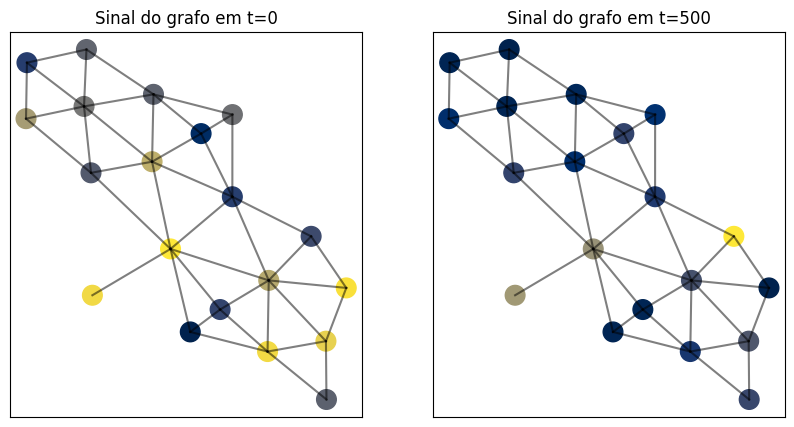

In [1]:
import pickle
import matplotlib.pyplot as plt

from code import compression

with open("grafos/graph_list.pickle", "rb") as f:
    all_graphs = pickle.load(f)


comp = compression.Compressor(all_graphs[0], 20)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Sinal do grafo em t=0")
comp.plot(compression.signal(all_graphs[0]))
plt.subplot(1,2,2)
plt.title("Sinal do grafo em t=500")
comp.plot(compression.signal(all_graphs[500]))

Text(0.5, 1.0, 'Sinal ao longo do tempo')

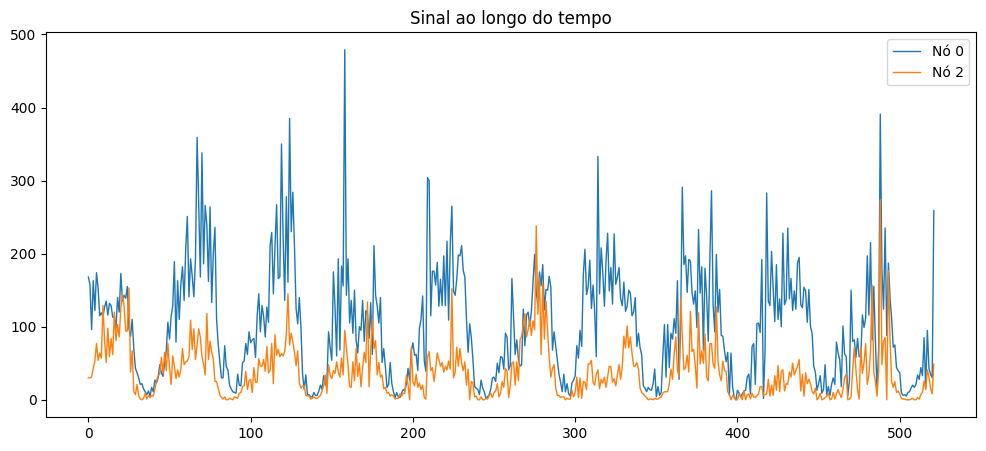

In [2]:
plt.figure(figsize=(12, 5))
compression.lineplot(all_graphs, 0, [20])
compression.lineplot(all_graphs, 2, [20])
plt.legend()
plt.title("Sinal ao longo do tempo")

# Compressão dos Dados

Para armazenar todas as séries temporais para cada nó, é necessário muito espaço em disco, pois o número total de valores a ser guardado é:

$
\text{Custo Original} = \text{Número de Nós} \times \text{Duração das Séries Temporais}
$

Porém, é possível comprimir esses dados utilizando a transformada de Fourier em grafos. Para isso, iremos guardar apenas os coeficientes de Fourier para cada nó e a lista de componentes de frequência. Dessa forma, o custo de armazenamento dos dados é alterado para:

$
\text{Custo Comprimido} = (\text{Número de Nós} \times \text{Número de Componentes}) + (\text{Número de Componentes} \times \text{Duração das Séries Temporais})
$

Para que o custo comprimido seja menor que o custo original, é necessário que o número de componentes de Fourier utilizado seja menor que o número original de nós. Para isso, utilizamos um filtro que seleciona apenas as componentes com menor frequência, descartando a informação de alta frequência.

Esse descarte é feito com base nas seguintes suposições:

 - Os sinais dos vizinhos de um nó carregam informação correlacionada com o sinal do nó em questão
 - Mudanças bruscas (de alta frequência) entre nós vizinhos tem maior chance de corresponder a ruído

Ambas as suposições fazem sentido nesse conjunto de dados por se tratar do número de casos de uma doença com alto grau de transmissão, como visto no gráfico acima.


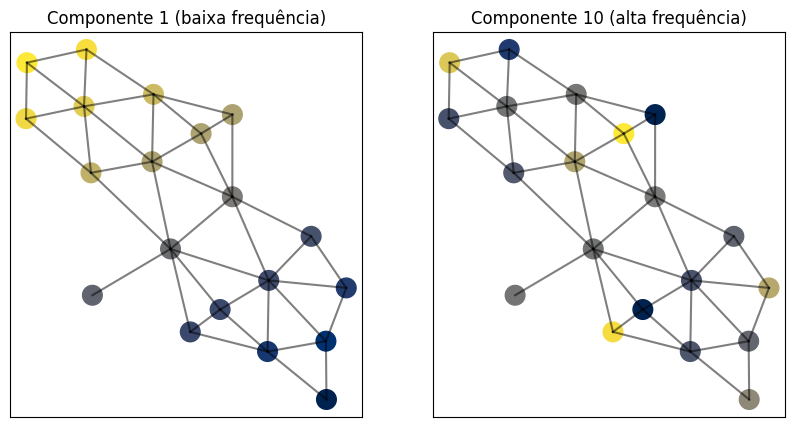

In [2]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Componente 1 (baixa frequência)")
comp.plot_component(1)
plt.subplot(1,2,2)
plt.title("Componente 10 (alta frequência)")
comp.plot_component(10)


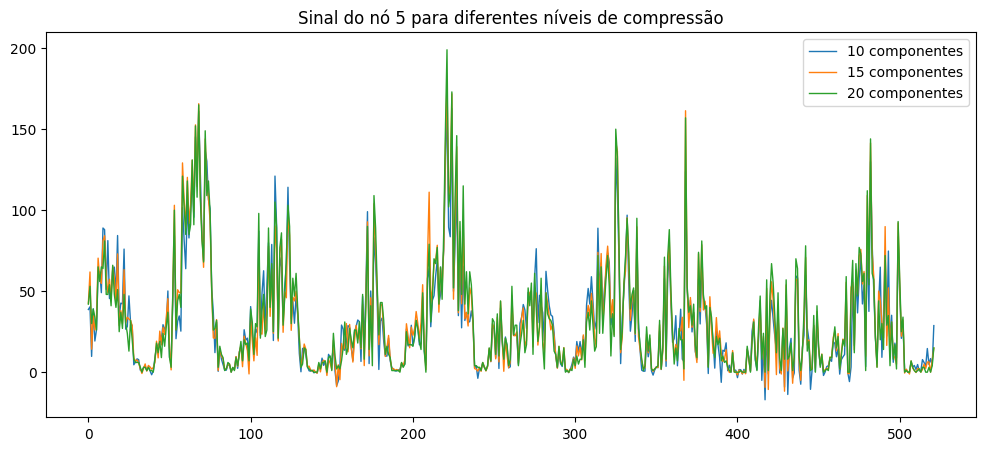

In [4]:
plt.figure(figsize=(12, 5))
plt.title("Sinal do nó 5 para diferentes níveis de compressão")
compression.lineplot(all_graphs, 5)

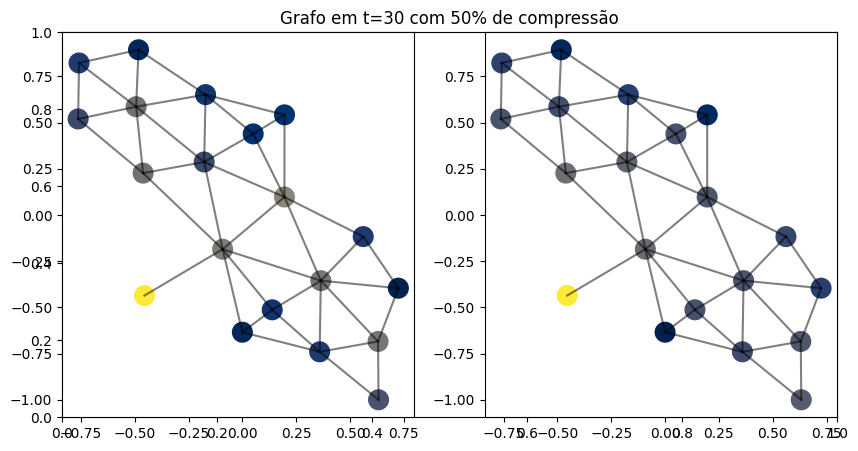

In [5]:
plt.figure(figsize=(10, 5))
plt.title(r"Grafo em t=30 com 50% de compressão")
compression.plot_recons(all_graphs[30], 10)


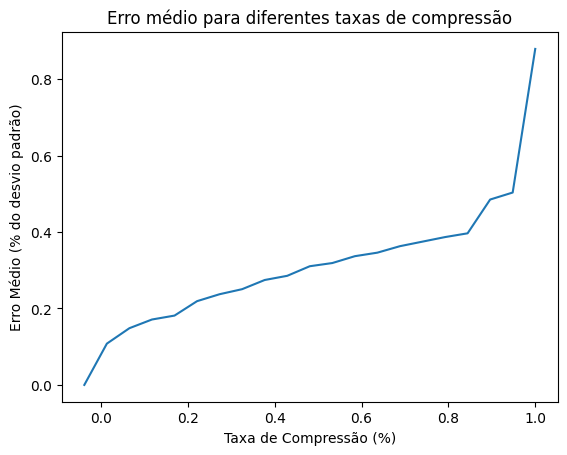

In [6]:
plt.title("Erro médio para diferentes taxas de compressão")
compression.metrics(all_graphs)